In [29]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import re
import string

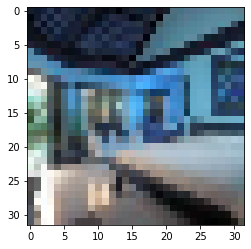

In [23]:
os.listdir(r'images/train/b/bedroom')
image = cv2.imread(r'images/train/b/bedroom/00000001.jpg')
image = cv2.resize(image, (32, 32))
plt.imshow(image)

In [69]:
with open('categories_tinyplaces.txt') as f:
    lines = f.readlines()
    lines = [line.rstrip() for line in lines]
categories = [re.sub(r'\s[0-9]+', '', line) for line in lines]
categories

['/b/bathroom',
 '/b/bedroom',
 '/b/bookstore',
 '/c/classroom',
 '/d/dining_room',
 '/f/food_court',
 '/k/kitchen',
 '/l/lobby',
 '/l/living_room',
 '/o/office',
 '/b/baseball_field',
 '/b/bridge',
 '/c/campsite',
 '/c/canyon',
 '/c/coast',
 '/f/fountain',
 '/h/highway',
 '/p/playground',
 '/m/mountain',
 '/r/rainforest']

In [72]:
category_nums = [re.findall(r'[0-9]+', line)[0] for line in lines]
category_nums

['16',
 '18',
 '20',
 '33',
 '45',
 '48',
 '59',
 '63',
 '62',
 '70',
 '15',
 '24',
 '27',
 '29',
 '35',
 '49',
 '53',
 '74',
 '68',
 '77']

In [46]:
with open('train.txt') as f:
    lines = f.readlines()
    lines = [line.rstrip() for line in lines]
lines = [re.sub(r'\s[0-9]+', '', line) for line in lines]

In [61]:
train_labs = []
for cat in categories:
    count = 0
    for line in lines:
        if cat in line:
            train_labs.append(line)
            count += 1
        if count == 500:
            break

In [132]:
def load_train_labels():
    with open(f'train.txt') as f:
        lines = f.readlines()
        lines = [line.rstrip() for line in lines]
    lines = [re.sub(r'\s[0-9]+', '', line) for line in lines]
    labs = []
    for cat in categories:
        count = 0
        for line in lines:
            if cat in line:
                labs.append(line)
                count += 1
            if count == 500:
                break
    labs = ["images/" + lab for lab in labs]
    return labs

In [135]:
def load_val_labels():
    with open('val.txt') as f:
        lines = f.readlines()
        lines = [line.rstrip() for line in lines]
    labs = []
    for num in category_nums:
        count = 0
        for line in lines:
            if num in line[-2:]:
                labs.append(line[:-3])
                count += 1
            if count == 50:
                break
    labs = ["images/" + lab for lab in labs]
    return labs

In [94]:
len(load_train_labels())

10000

In [95]:
len(load_val_labels())

1000

In [ ]:
"".join('images/')

In [103]:
np.array(image).shape

(32, 32, 3)

In [144]:
def create_image_data(data, num_labels):
    if data == "train":
        labels = load_train_labels()
    elif data == "val":
        labels = load_val_labels()
    image_array = []
    for img in labels:
        img = cv2.imread(img)
        img = cv2.resize(img, (32, 32))
        image_array.append(img.ravel())
    labels = np.repeat(np.arange(num_labels), len(labels) / num_labels)
    d = {'data': np.array(image_array), 'label': labels}
    return d


In [149]:
a = create_image_data("train", 2)

In [153]:
len(a["label"][a["label"] == 0])

5000

In [154]:
import pickle
with open('cs188/tinyplace-val.p', 'rb') as fo2:
    data_val = pickle.load(fo2, encoding='bytes')

FileNotFoundError: [Errno 2] No such file or directory: 'css188/tinyplace-val.p'

In [ ]:
import tiny